# Temperature Forecast Project using ML

## Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



## Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


here we can clearly see that the date column is in object datatype.so we need to convert it into datetime datatype.

In [6]:
# converting date column in datetime datatype
df['Date']=pd.to_datetime(df['Date'])

In [7]:
# extracting date,month and year from date column
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year


In [8]:
# dropping date column
df.drop(columns=['Date'],inplace=True)

# Exploratory data analysis

In [9]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [10]:
print('Number of Rows :',df.shape[0])
print('Number of Columns :',df.shape[1])

Number of Rows : 7752
Number of Columns : 27


In [12]:
# checking for duplicate values
df.duplicated().sum()

0

In [13]:
#check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

it means there are no blank spaces in the dataset.

In [14]:
# checking null values in the dataset
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

There are many null values present in the dataset.

<Axes: >

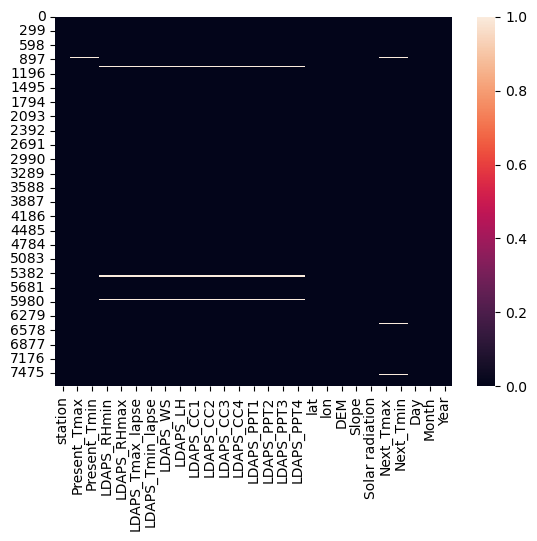

In [15]:
# visualization using heatmap
sns.heatmap(df.isnull())

## handling null values

In [16]:
# filling nulls with zeros because dataset have numerical values.
df.fillna(0, inplace=True)

In [17]:
# again checking null values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

Now all the null values are removed.

# Data Visualization

### Univariate analysis

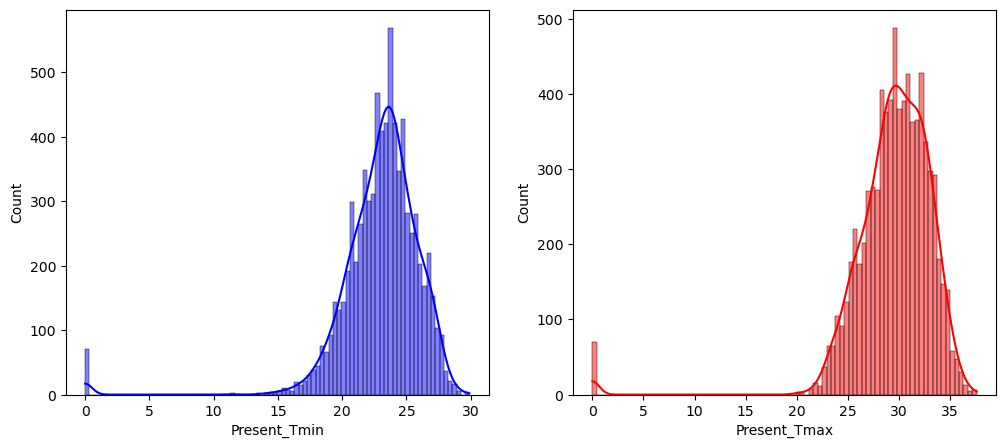

In [18]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.show()

minimum temperature is in the range(14-30)
maximum temperature is in the range(21-38)

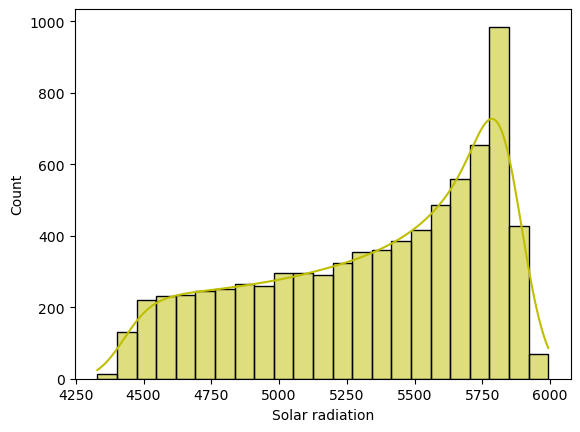

In [19]:
sns.histplot(df['Solar radiation'],kde=True,color='y')
plt.show()

The range of solar radiation is (4250 - 6000)

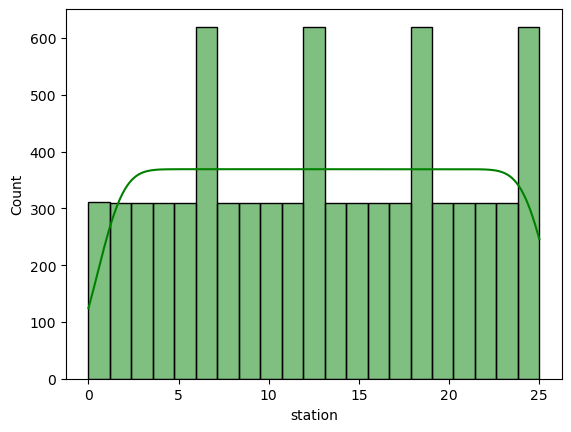

In [20]:
sns.histplot(df['station'],kde=True,color='g')
plt.show()

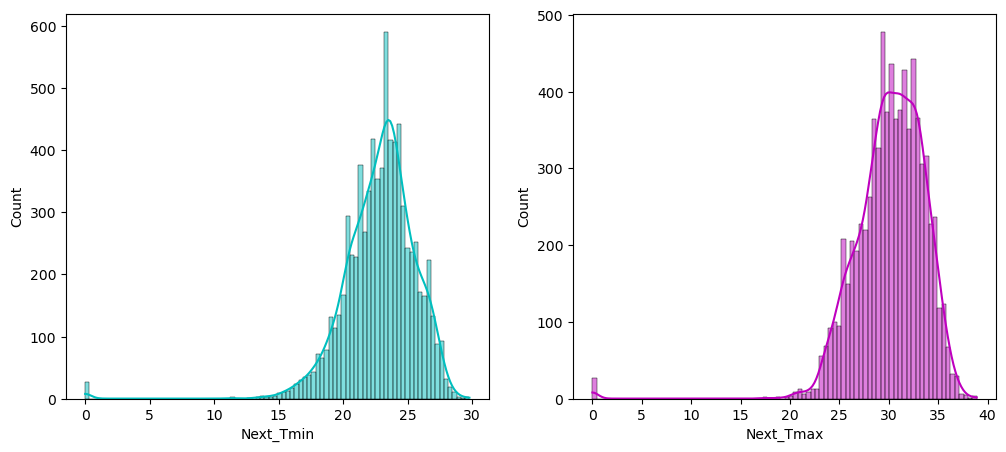

In [21]:
# Plotting histogram for NEXT_Tmax and NEXT_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmin'],kde=True,color='c')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmax'],kde=True,color='m')
plt.show()

Next Day Maximum Temperature is in range of ('19 - 38').
Next Day Minimum Temeperature is in range of ('13 - 30')

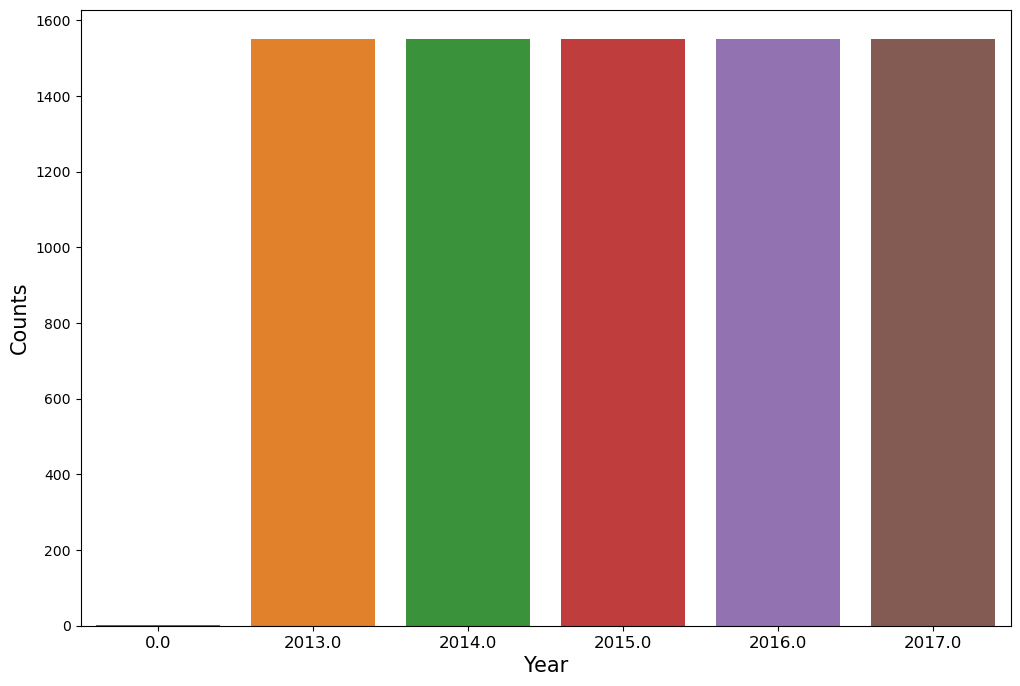

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Year')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks( fontsize=12)
plt.show()

Count of average temperature is same in all the years.

# Bivariate analysis

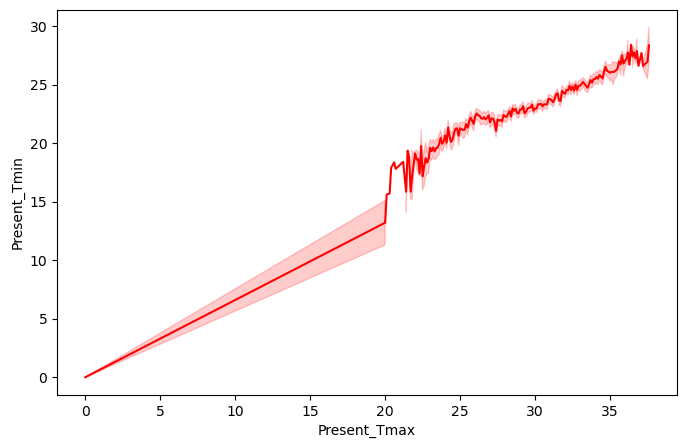

In [23]:
# Temperature variation between Present Tmax And Tmin
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Present_Tmax', y='Present_Tmin',color='r')
plt.show()

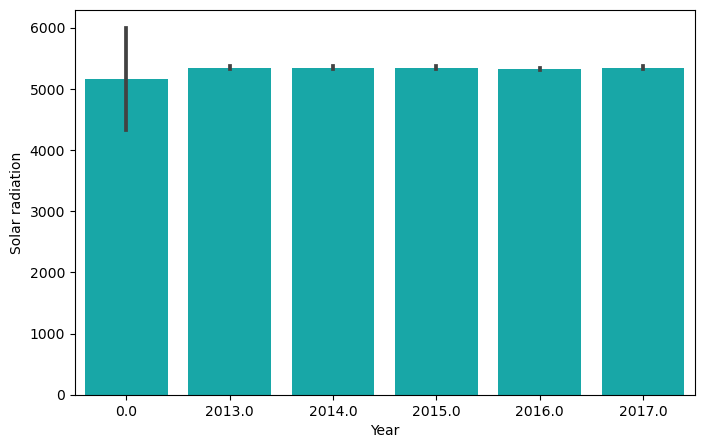

In [24]:
# variation between solar radiation and year
plt.figure(figsize=(8, 5))
sns.barplot(data=df, y='Solar radiation',x='Year',color='c')
plt.show()

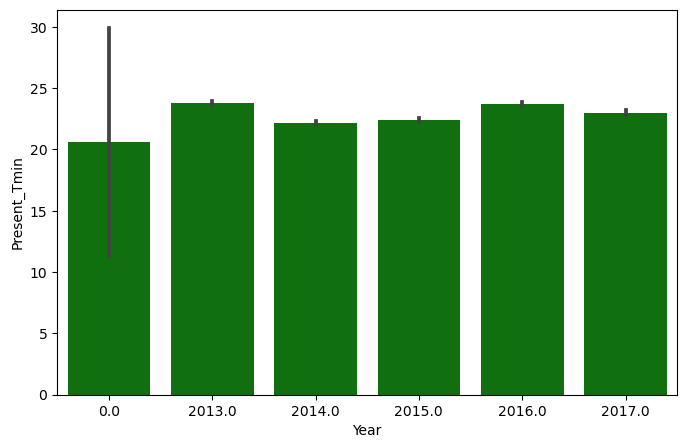

In [25]:
# variation between year and present_tmin
plt.figure(figsize=(8, 5))
sns.barplot(data=df,x='Year', y='Present_Tmin',color='g')
plt.show()

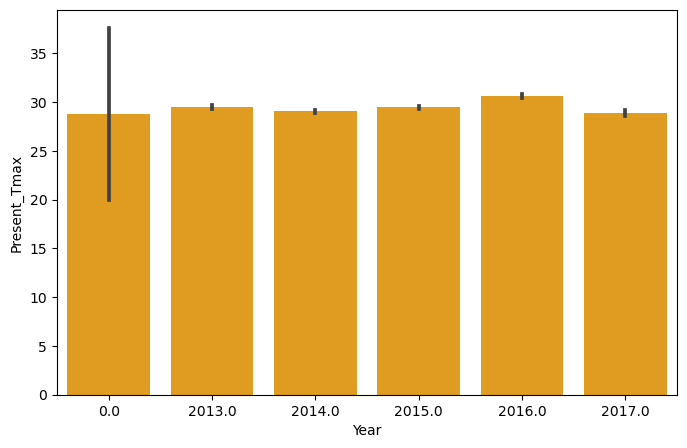

In [26]:
# variation between year and present_tmax
plt.figure(figsize=(8, 5))
sns.barplot(data=df,x='Year', y='Present_Tmax',color='orange')
plt.show()

# Statistical summary


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7752.0,12.996646,7.213660,0.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7752.0,29.499407,4.083116,0.000000,27.700000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.015338,3.256071,0.000000,21.600000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.210230,15.618676,0.000000,45.735368,54.828714,67.038254,98.524734
LDAPS_RHmax,7752.0,87.519784,11.227876,0.000000,84.038809,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.326939,4.123757,0.000000,27.601014,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.285106,3.277967,0.000000,22.032374,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.029203,2.281613,0.000000,5.647741,6.531345,8.007471,21.857621
LDAPS_LH,7752.0,61.900288,34.120103,-13.603212,36.776474,56.487289,83.904586,213.414006
LDAPS_CC1,7752.0,0.365206,0.263668,0.000000,0.141643,0.312156,0.571696,0.967277


outliers are present in the dataset.

# Data Correlation

<Axes: >

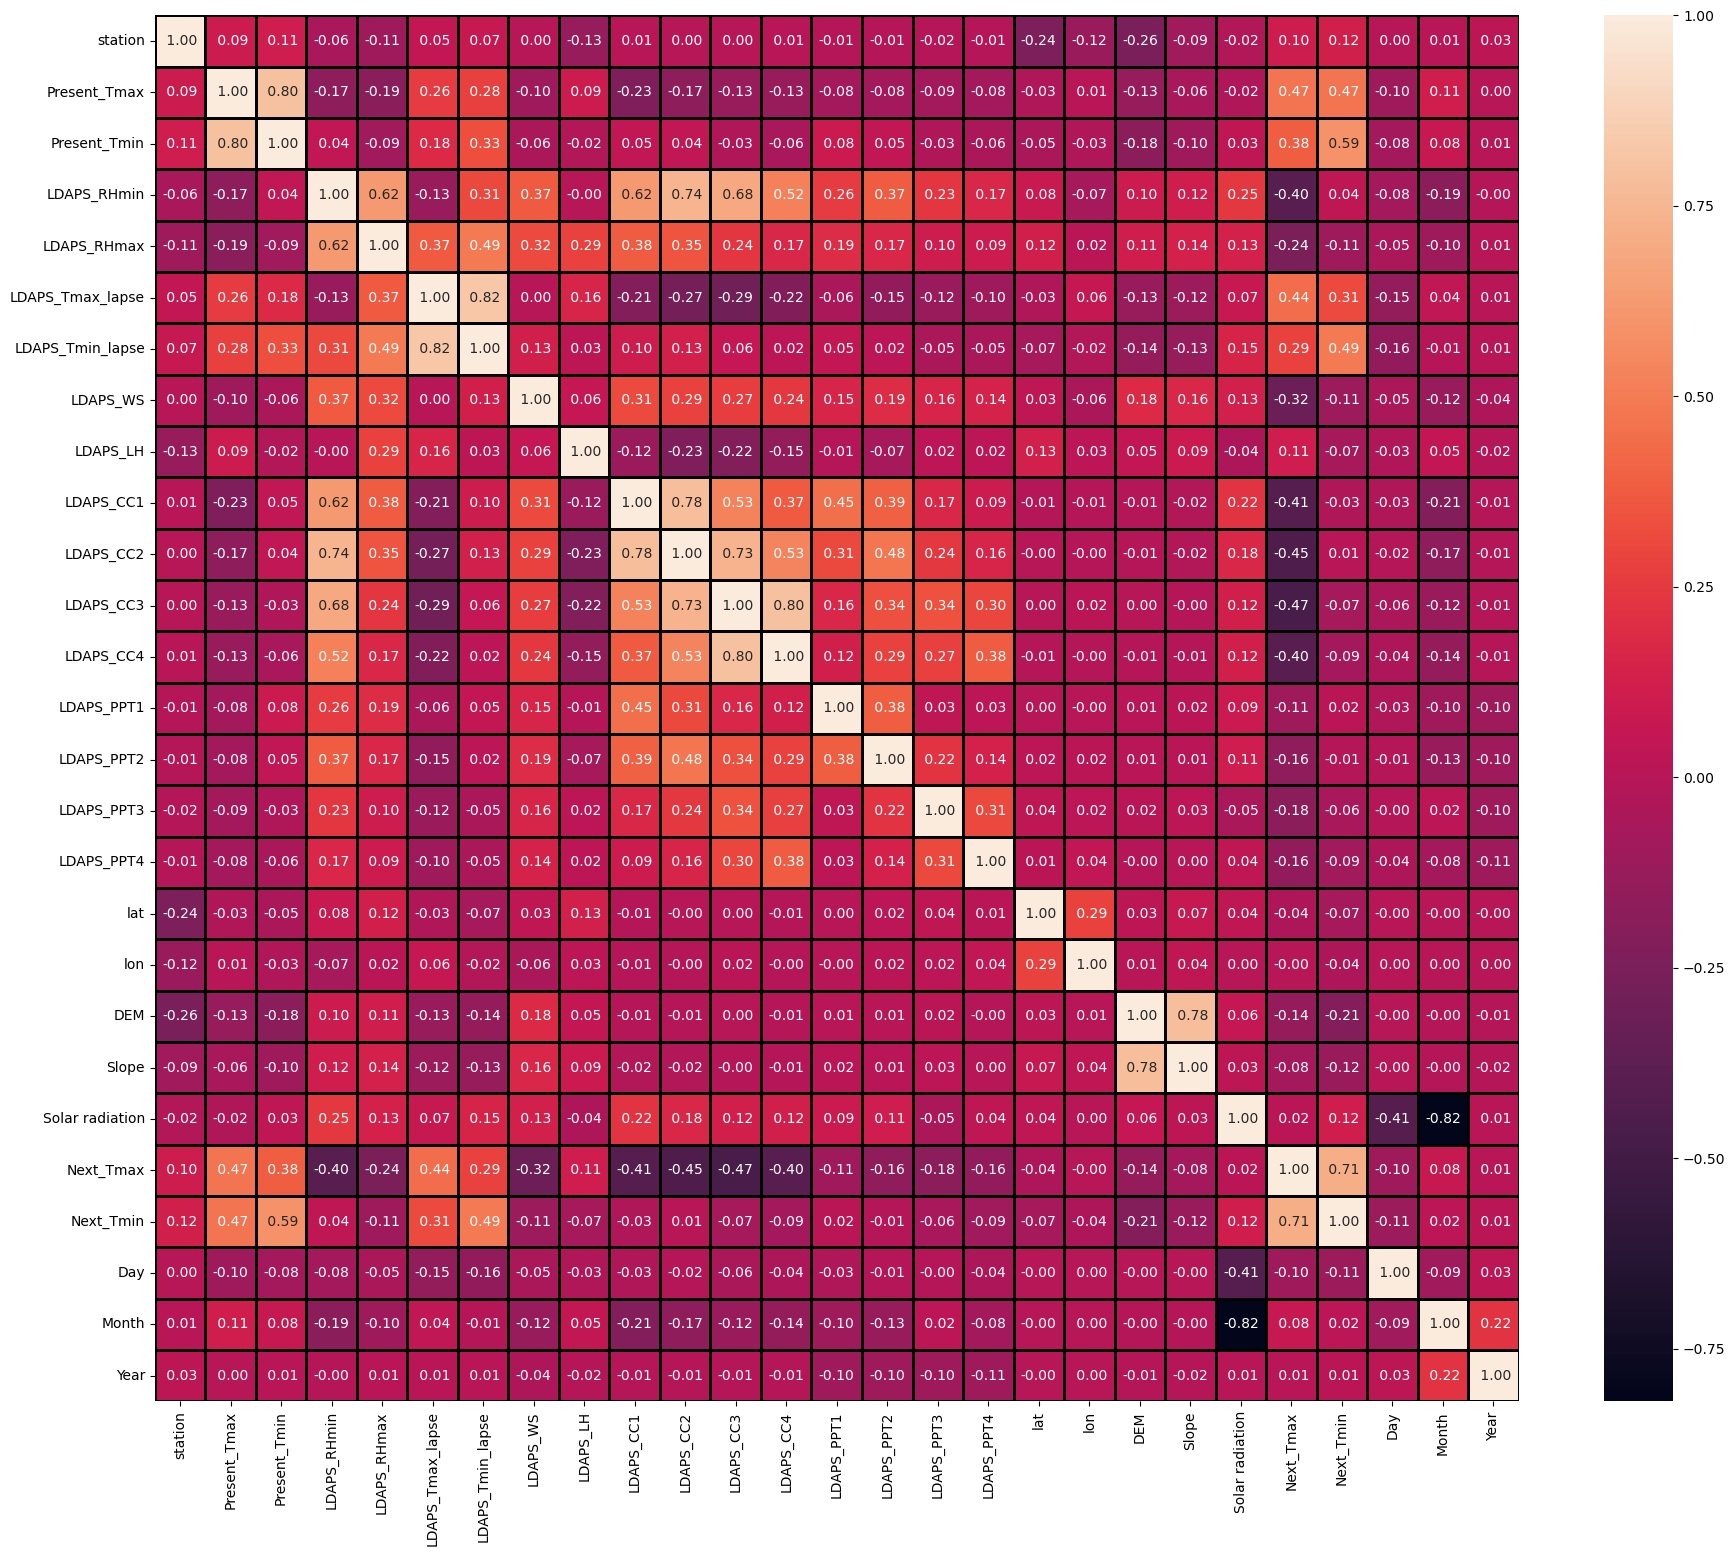

In [28]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

Present_Tmax & Prent_Tmin is highly correlated to Target Variable.
LDAPS_Tmax_lapes & LDAPS_Tmin_lapes is also highly correlated to Target Variables.
LDAPS_cc1,LDAPS_cc2,LDAPS_cc3 & LDAPS_cc4 are negativity correlated to target variables.

# Outliers Detection

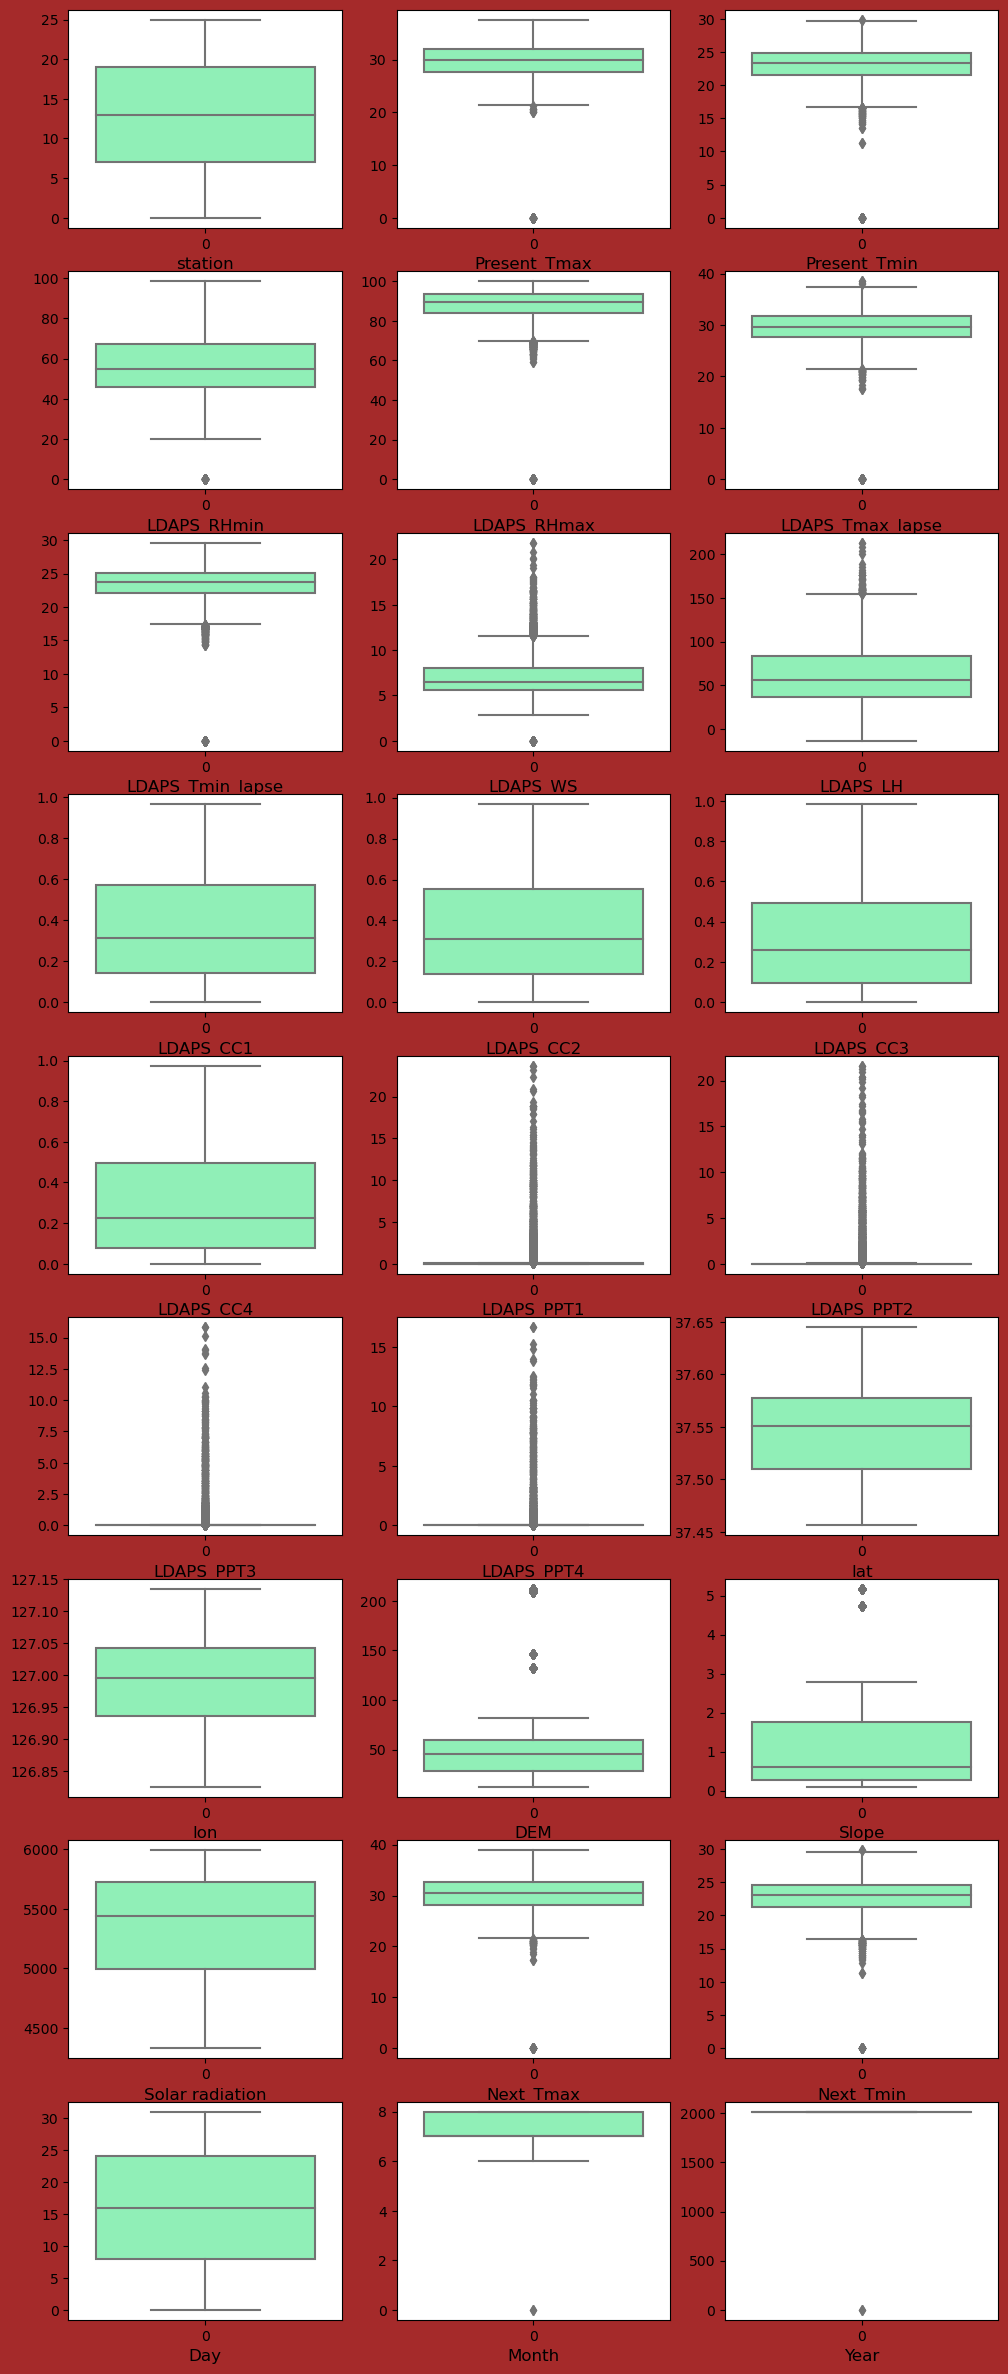

In [29]:
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in df:
    if index <=27:
        ax = plt.subplot(9,3,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

# Removal Of Outliers

In [30]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
        'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope',
       'Solar radiation', 'Month']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (e.g., 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

# checking for skewness

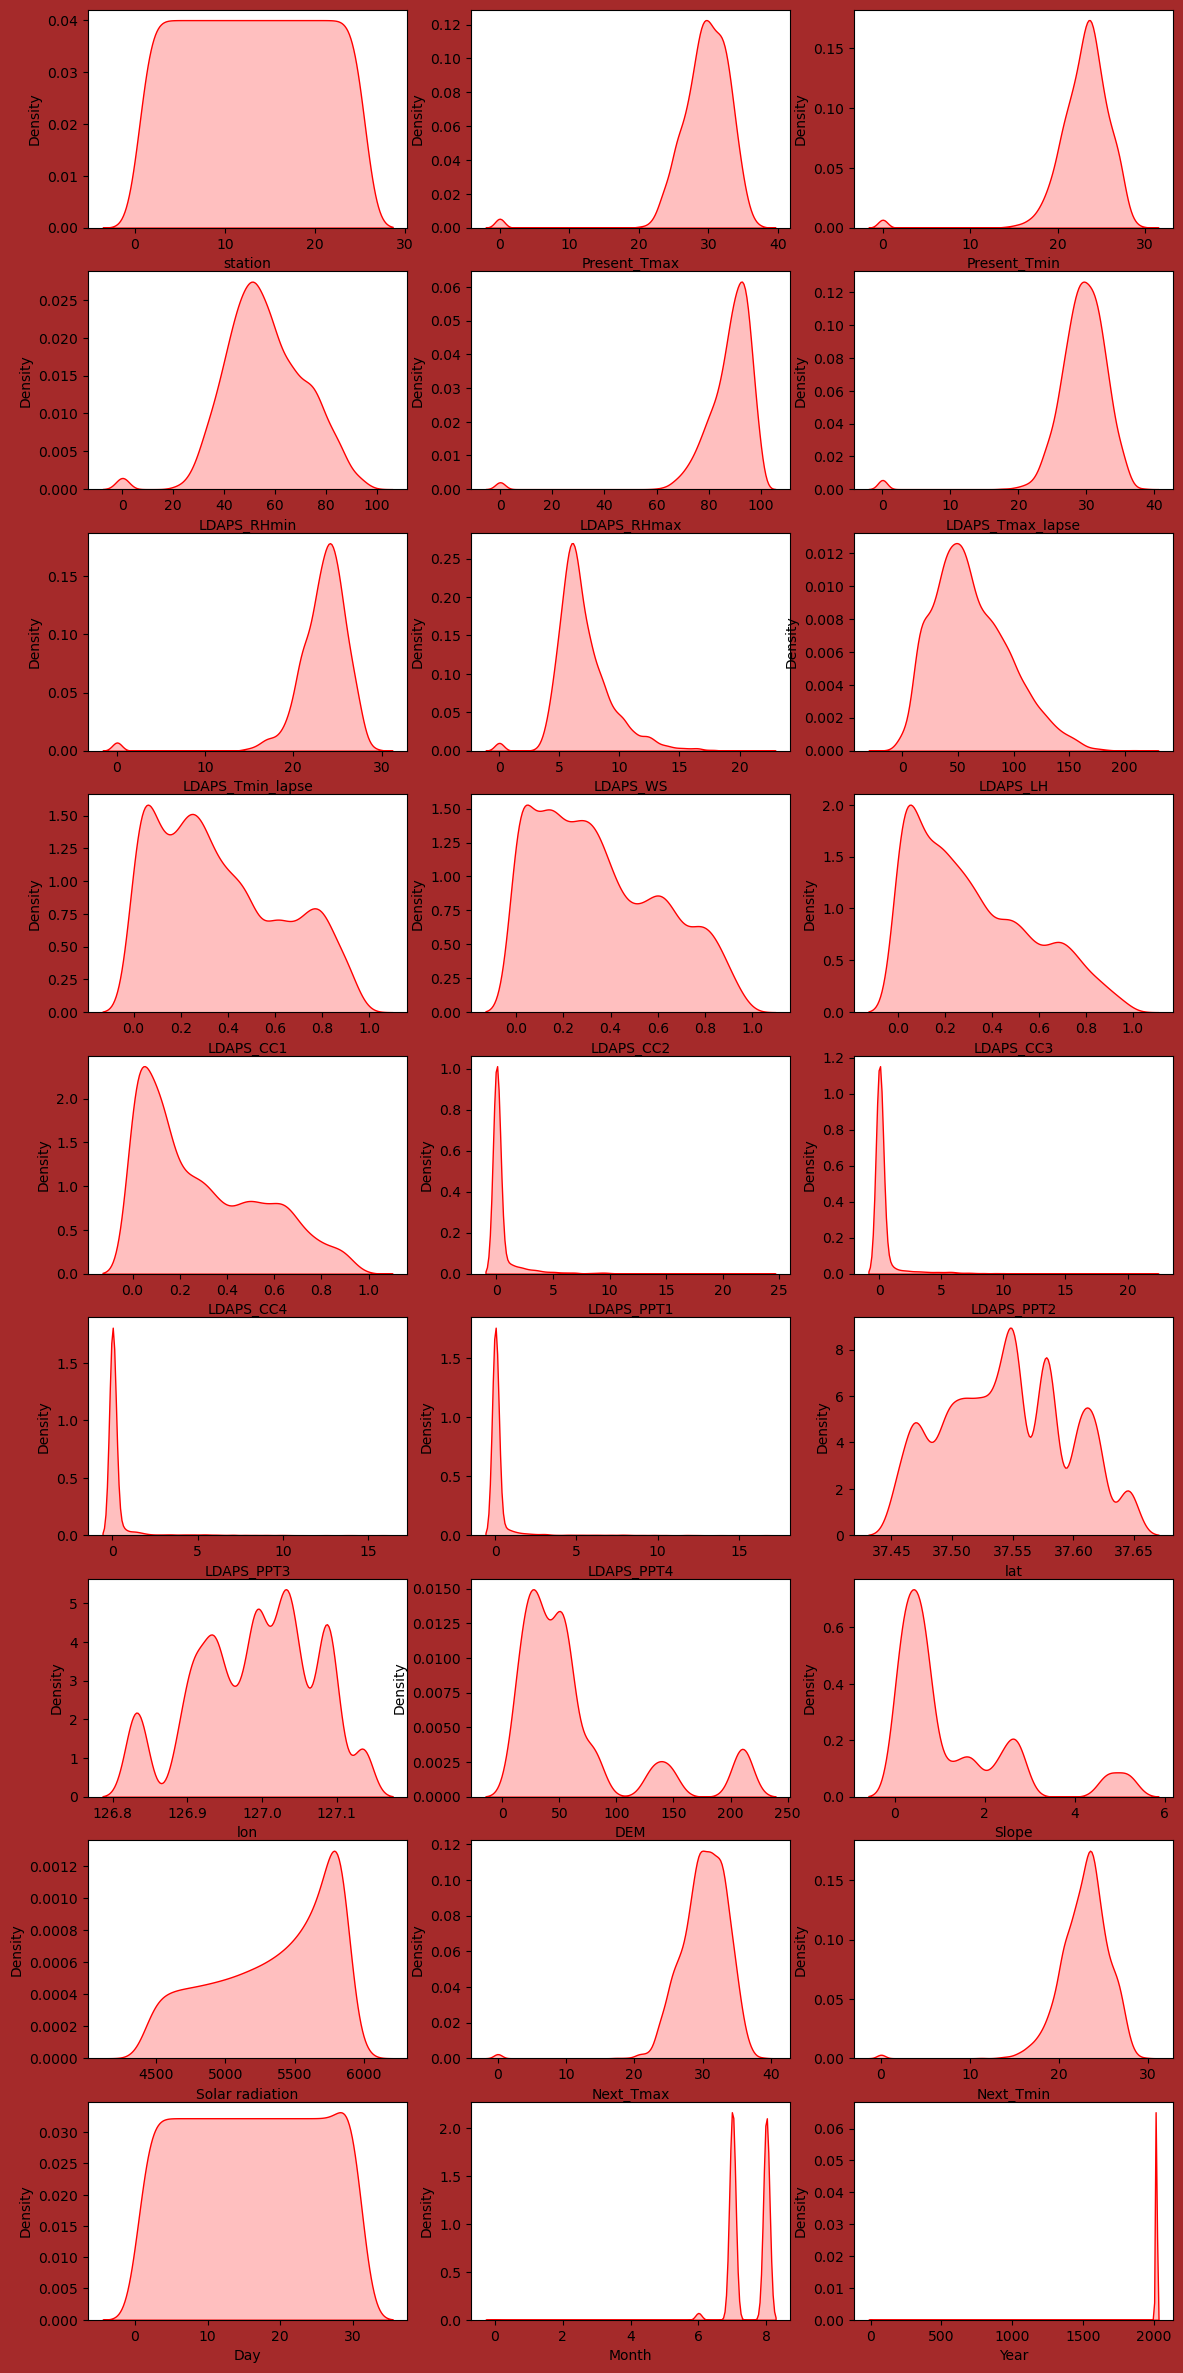

In [32]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [33]:
df.skew()

station             -0.000115
Present_Tmax        -3.402987
Present_Tmin        -3.232442
LDAPS_RHmin         -0.113889
LDAPS_RHmax         -4.712138
LDAPS_Tmax_lapse    -3.457452
LDAPS_Tmin_lapse    -3.573353
LDAPS_WS             1.163684
LDAPS_LH             0.635208
LDAPS_CC1            0.460727
LDAPS_CC2            0.474379
LDAPS_CC3            0.643064
LDAPS_CC4            0.671739
LDAPS_PPT1           5.395178
LDAPS_PPT2           5.776835
LDAPS_PPT3           6.458608
LDAPS_PPT4           6.826930
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -2.213759
Next_Tmin           -2.049088
Day                 -0.009012
Month               -0.840039
Year               -62.067548
dtype: float64

'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse',&,'LDAPS_Tmin_lapse' are left skewed.

'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' are Right Skewed.

# Removing skewness

In [34]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']
# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x + 1)[0])


In [35]:
# columns with right-skewed data containing zeros
right_skewed_columns =  ['LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Year']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed_columns] = scaler.fit_transform(df[right_skewed_columns].values)

# Splitting data into feature and target variable

In [36]:
feature_columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Day', 'Month', 'Year']
label_columns=['Next_Tmax']
labelcolumn=['Next_Tmin']

In [37]:
X = df[feature_columns]
Y = df[labelcolumn]
y = df[label_columns]

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [39]:
# checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

In [40]:
vif

,VIF,Features
0,1.231416,station
1,2.947018,Present_Tmax
2,2.799932,Present_Tmin
3,6.343819,LDAPS_RHmin
4,2.856997,LDAPS_RHmax
5,5.498659,LDAPS_Tmax_lapse
6,6.711672,LDAPS_Tmin_lapse
7,1.360743,LDAPS_WS
8,1.551628,LDAPS_LH
9,5.059065,LDAPS_CC1


1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient is moderately inflated.

VIF > 5: High multicollinearity.

# Machine Learning model

# Next_Tmin

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [42]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)

In [43]:
X['LDAPS_LH'] = X['LDAPS_LH'].fillna(0)

# DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

pred = dtr.predict(X_test)

# Evaluate the model using regression metrics
r2 = r2_score(Y_test, pred)

print("R-squared:", r2*100)

R-squared: 29.806578235417327


# RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(Y_test, pred2)

print("R-squared:", R3*100)

R-squared: 68.42616032279426


# LinearRegression

In [47]:
from sklearn.linear_model import LinearRegression
rf=LinearRegression()
rf.fit(X_train,Y_train)
pred3=rf.predict(X_test)
R4=r2_score(Y_test,pred3)
print("R-squared:", R4*100)

R-squared: 65.0631386901611


# XGBRegressor

In [48]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

pred4 = xgb.predict(X_test)

# Evaluate the model using regression metrics
R5 = r2_score(Y_test, pred4)

print("R-squared:", R5*100)

R-squared: 65.43269251154959


# ExtraTreesRegressor

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, Y_train)

pred5 = etr.predict(X_test)

# Evaluate the model using regression metrics
R6 = r2_score(Y_test, pred5)

print("R-squared:", R6*100)

R-squared: 69.04836480370093


# BaggingRegressor

In [50]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()
br.fit(X_train, Y_train)

pred6 = br.predict(X_test)

# Evaluate the model using regression metrics
R7 = r2_score(Y_test, pred6)

print("R-squared:", R7*100)

R-squared: 67.75938805344174


# Cross Validation

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [52]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7038245915735167
Mean squared error : 2.30630211006019
Root Mean Squared Error: 1.5186514116347405


 R2 Score :
0.6971324987980745


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6643035253654344
Mean squared error : 2.359194079965607
Root Mean Squared Error: 1.535966822547156


 R2 Score :
0.6901866356828198


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0174978503869303
Mean squared error : 5.908104041272571
Root Mean Squared Error: 2.4306591783449547


 R2 Score :
0.22413776581311695


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.6504362069960903
Mean squared error : 5.95118808165669
Root Mean Squared Error: 2.4395057043705988


 R2 Score :
0.21847989662247536


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.764821591306253
Mean squared error : 2.3530907638498615
Root Mean Squared Error: 1.5339787364399355


 R2 Score :
0.69098813349742


 Error of  XGBRegressor

# Hyper Parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter = {'n_estimators':[200,400],'gamma':np.arange(0,0.1),
              'booster' : ['gbtree','gblinear'], 'max_depth':[4,6],
              'eta' : [ 0.01, 0.1] }

In [56]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.655 total time=   0.4s
[CV 2/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.599 total time=   0.5s
[CV 3/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.587 total time=   0.5s
[CV 4/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.563 total time=   0.4s
[CV 5/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.669 total time=   0.4s
[CV 1/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.683 total time=   0.9s
[CV 2/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.618 total time=   1.0s
[CV 3/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.625 total time=   0.9s
[CV 4/5] END booster=gbtree, eta=0.

[CV 3/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=200;, score=0.567 total time=   0.2s
[CV 4/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=200;, score=0.562 total time=   0.2s
[CV 5/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=200;, score=0.634 total time=   0.2s
[CV 1/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.666 total time=   0.5s
[CV 2/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.584 total time=   0.5s
[CV 3/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.567 total time=   0.4s
[CV 4/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.565 total time=   0.4s
[CV 5/5] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.637 total time=   0.4s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'], 'eta': [0.01, 0.1],
                         'gamma': array([0.]), 'max_depth': [4, 6],
                         'n_estimators': [200, 400]},
             verbose=5)

In [57]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 400}

In [58]:
# final model
Final_mod =  XGBRegressor(n_estimators=400 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
Y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,Y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.5929833125166102
Mean squared error : 2.4213824547082874
Root Mean Squared Error: 1.5560791929424054


 R2 Score of Final Model :
0.6820199529312556




# Saving model for Next_Tmin

In [59]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

# Prediction based on saved model

In [60]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted


,Actual Values,Predicted Values
0,25.3,25.387232
1,20.4,19.732224
2,25.1,25.262157
3,25.3,25.765524
4,16.8,16.667202
...,...,...
2321,20.9,20.813957
2322,22.6,22.478317
2323,24.6,21.438482
2324,21.2,21.003941


# Machine Learning model for Next_Tmax

In [61]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.3)

In [62]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,etr,dtc,BR,adb,gbr,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    max_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
    print('Mean squared error :', mean_squared_error(y_test,max_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,max_pred)) 



 Error of  RandomForestRegressor() :
Mean absolute error : 0.9044690455717967
Mean squared error : 4.721004304815132
Root Mean Squared Error: 2.172787220326724


 R2 Score :
0.6202411865891174


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.7723108340498707
Mean squared error : 3.930607409716251
Root Mean Squared Error: 1.9825759530762626


 R2 Score :
0.6838209182788878


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.3520636285468615
Mean squared error : 11.802231298366292
Root Mean Squared Error: 3.4354375701453654


 R2 Score :
0.05062544660317303


 Error of  BaggingRegressor() :
Mean absolute error : 0.9701547721410145
Mean squared error : 5.0344713671539125
Root Mean Squared Error: 2.2437627698029736


 R2 Score :
0.5950258146150323


 Error of  AdaBoostRegressor() :
Mean absolute error : 3.187338105515687
Mean squared error : 18.207385166157948
Root Mean Squared Error: 4.267011268576397


 R2 Score :
-0.4646067954148596


 Error of  GradientBoosting

# HyperParameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators': [50, 100],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    }
gsc = GridSearchCV(ExtraTreesRegressor(),parameter,verbose =5)

In [64]:
gsc.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.614 total time=   1.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.657 total time=   1.1s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.647 total time=   1.1s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.642 total time=   1.1s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.722 total time=   1.1s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.639 total time=   2.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.674 total time=   2.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.641 total time=   2.2s


[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.693 total time=   2.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.717 total time=   2.1s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.663 total time=   2.0s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.679 total time=   2.0s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.764 total time=   2.1s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.696 total time=   4.2s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.712 total time=   4.2s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.672 total time=   4.2s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_sp

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             verbose=5)

In [65]:
gsc.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [66]:
# final model
Final_mod =  ExtraTreesRegressor(max_depth= 20,min_samples_leaf= 2,min_samples_split= 3,n_estimators= 50)

Final_mod.fit(X_train,y_train)
max_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
print('Mean squared error :', mean_squared_error(y_test,max_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,max_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.7875541861254052
Mean squared error : 3.7349553312727393
Root Mean Squared Error: 1.9326032524221672


 R2 Score of Final Model :
0.6995592223247661




# Saving Model based on Next_Tmax

In [67]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

# Prediction based on saved model

In [68]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted1 = np.array(Model.predict(X_test))
df_Predicted1 = pd.DataFrame({"Actual Values":actual,"Predicted Values ":predicted1},index= range(len(actual)))
df_Predicted1 

,Actual Values,Predicted Values
0,32.2,31.580948
1,24.2,24.536000
2,34.2,31.890517
3,29.3,30.981333
4,21.0,20.949667
...,...,...
2321,27.1,27.606667
2322,31.2,30.895493
2323,29.2,26.446333
2324,27.6,27.351000
